# Titanic data EDA: feature distributions

## 1. Data loading

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder


## 1. Data loading

In [2]:
data_df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
data_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 2. Feature types

### 2.1. Categorical features

#### 2.1.1. Levels

In [3]:
categorical_features=['neighbourhood_group','neighbourhood','room_type','host_name']
data_df[categorical_features].nunique()

neighbourhood_group        5
neighbourhood            221
room_type                  3
host_name              11452
dtype: int64

#### 2.1.1. Distributions

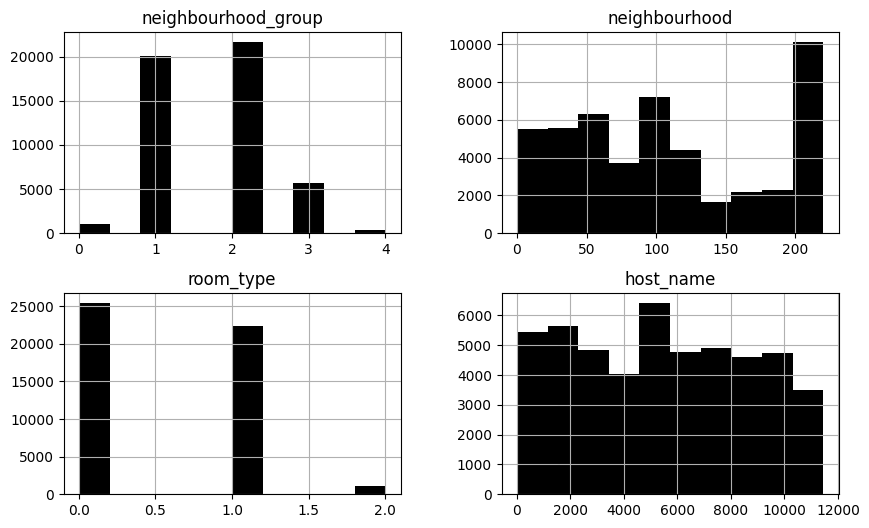

In [ ]:
feature_encoders={}

for feature in categorical_features:
    encoder=LabelEncoder()
    data_df[feature]=encoder.fit_transform(data_df[feature])
    feature_encoders[feature]=encoder


data_df[categorical_features].hist(grid=False, figsize=[10,6], color='black')
plt.tight_layout
plt.show()

### 2.2. Numeric features

#### 2.2.1. Descriptive statistics

In [5]:
numeric_features=['latitude','longitude','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365']

data_df[numeric_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.19000,0.72000,2.020000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


#### 2.2.2 Distribution plots

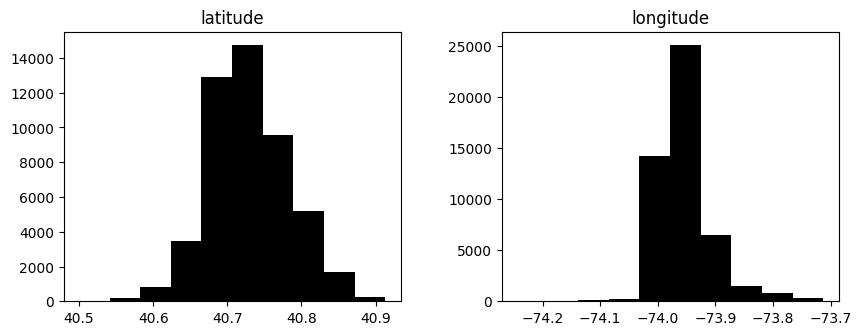

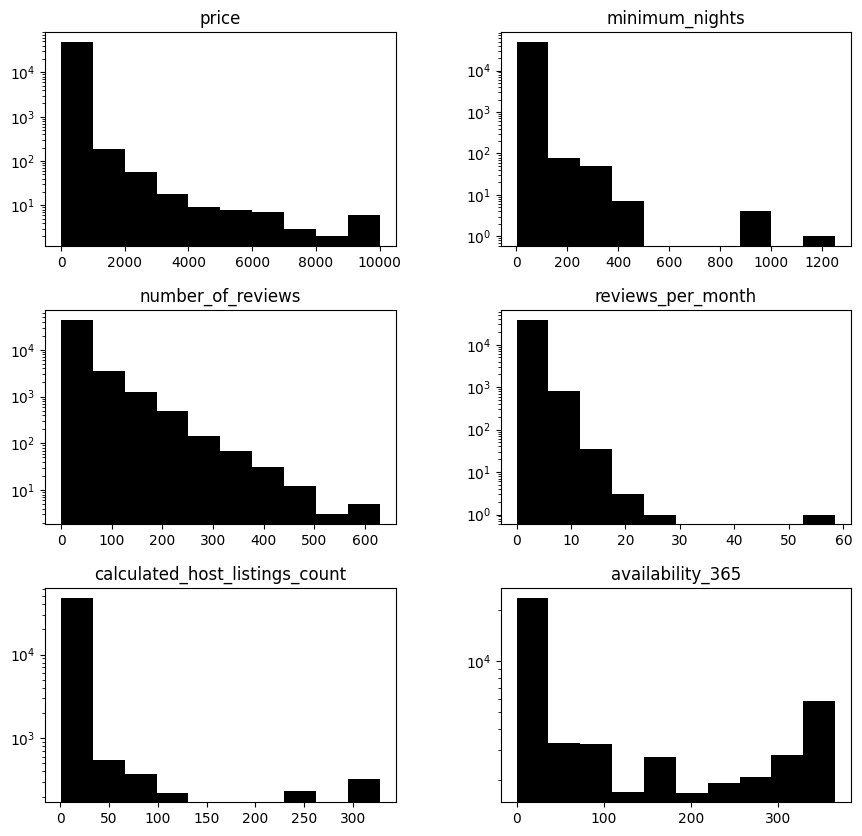

In [13]:
log_features=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
linear_features=['latitude','longitude']

data_df[linear_features].hist(grid=False, figsize=[10,3.5], color='black')
plt.tight_layout
plt.show()

data_df[log_features].hist(grid=False, figsize=[10.4,10], color='black', log=True)
plt.tight_layout
plt.show()

In [14]:
data_df[data_df['minimum_nights']>500].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,8281,2,6,40.71239,-74.01620,0,400,1000,0,NaN,NaN,1,362
5767,4204302,Prime W. Village location 1 bdrm,17550546,3590,2,92,40.73293,-73.99782,0,180,1250,2,2014-11-09,0.03,1,365
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,3751,2,94,40.82915,-73.94034,0,99,999,2,2018-01-04,0.07,1,42
26341,20990053,Beautiful place in Brooklyn! #2,151084261,675,1,214,40.71772,-73.95059,1,79,999,24,2018-06-28,1.12,6,249
38664,30378211,Shared Studio (females only),200401254,7018,2,92,40.73094,-73.99900,2,110,999,0,NaN,NaN,1,365


In [15]:
data_df[data_df['price']>5000].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,4663,2,202,40.77782,-73.97848,0,6000,14,17,2015-02-17,0.27,1,359
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,8051,2,115,40.71895,-73.99793,0,5250,1,0,NaN,NaN,1,0
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,5040,1,41,40.68766,-73.96439,0,6500,1,0,NaN,NaN,1,0
4377,2953058,Film Location,1177497,4840,1,41,40.69137,-73.96723,0,8000,1,1,2016-09-15,0.03,11,365
6530,4737930,Spanish Harlem Apt,1235070,8034,2,61,40.79264,-73.93898,0,9999,5,1,2015-01-02,0.02,1,0
